In [21]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split



In [62]:
#https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a
# Get the stock data

quandl.ApiConfig.api_key = 'qKYyca8_q3vn5ws7FpwZ'

df = quandl.get("WIKI/XOM", trim_start = "2017-02-26", trim_end ="2018-03-27")

# Take a look at the data
#df.head()

#df = quandl.get_table('WIKI/PRICES', ticker = ["TSLA","MSFT","FB","WMT","DG","JPM","DOV","XOM","KO","MMM"
#], 
#                      qopts = { 'columns': ['ticker','date', 'adj_close'] }, 
#                       date = { 'gte': '2018-02-26', 'lte': '2018-03-27' }, 
#                        paginate=True)
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-02-27,81.13,81.71,80.81,81.54,13465448.0,0.0,1.0,79.598309,80.167359,79.284350,80.000568,13465448.0
2017-02-28,81.53,81.99,81.05,81.32,16834063.0,0.0,1.0,79.990757,80.442072,79.519819,79.784722,16834063.0
2017-03-01,81.70,83.33,81.70,83.02,17482122.0,0.0,1.0,80.157548,81.756774,80.157548,81.452627,17482122.0
2017-03-02,82.80,84.25,82.79,83.30,14168481.0,0.0,1.0,81.236780,82.659405,81.226969,81.727340,14168481.0
2017-03-03,83.56,83.60,82.26,82.46,12304096.0,0.0,1.0,81.982432,82.021677,80.706975,80.903199,12304096.0


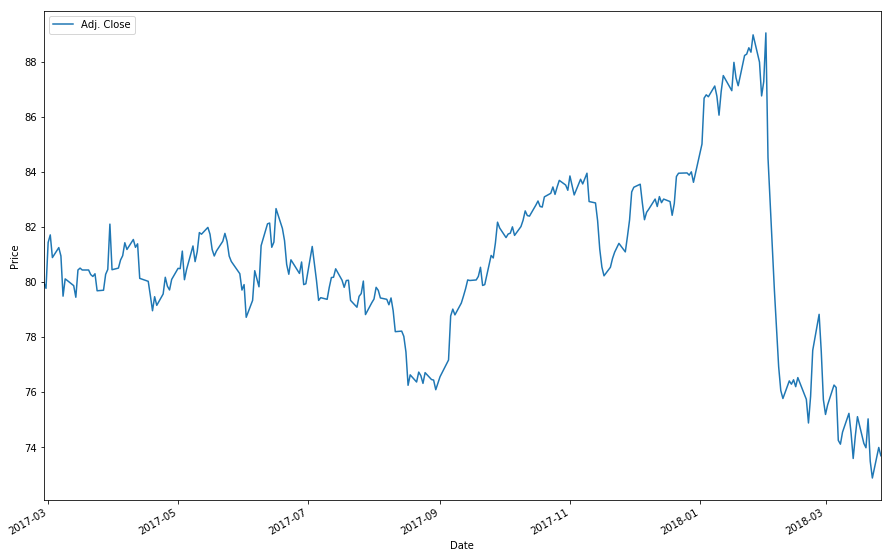

<Figure size 1800x3600 with 0 Axes>

In [63]:
df['Adj. Close'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(25,50))
plt.show()

In [64]:
#df.set_index('date', inplace=True)
#df.head()

In [65]:
# Get the Adjusted Close Price 
df = df[['Adj. Close']] 
# Take a look at the new data 
df.head()

,Adj. Close
Date,
2017-02-27,80.000568
2017-02-28,79.784722
2017-03-01,81.452627
2017-03-02,81.727340
2017-03-03,80.903199


In [66]:
# A variable for predicting 'n' days out into the future
forecast_out = 30
#'n=30' days
#Create another column (the target ) shifted 'n' units up
df['prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the 12)
df.tail()

,Adj. Close,prediction
Date,,
2018-03-21,75.04,NaN
2018-03-22,73.50,NaN
2018-03-23,72.89,NaN
2018-03-26,74.00,NaN
2018-03-27,73.70,NaN


In [67]:
#df1 = df.reset_index()

In [68]:
#df1.head()

In [69]:
#X = df1[['Date','Adj. Close']].values

#print(X)

In [70]:

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[80.00056824]
 [79.78472172]
 [81.45262663]
 [81.72734038]
 [80.90319913]
 [81.26621373]
 [80.96206636]
 [79.50019677]
 [80.12811391]
 [80.06924668]
 [79.88283378]
 [79.46095195]
 [80.45188369]
 [80.52056212]
 [80.45188369]
 [80.45188369]
 [80.2850932 ]
 [80.21641476]
 [80.31452681]
 [79.69642088]
 [79.71604329]
 [80.2949044 ]
 [80.4715061 ]
 [82.11978859]
 [80.46169489]
 [80.52056212]
 [80.81489828]
 [80.97187757]
 [81.44281542]
 [81.19753529]
 [81.56054989]
 [81.27602493]
 [81.4035706 ]
 [80.14773632]
 [80.03981306]
 [79.51981918]
 [78.97039168]
 [79.48057436]
 [79.16661579]
 [79.57868641]
 [80.18698114]
 [79.86321137]
 [79.72585449]
 [80.1084915 ]
 [80.51075092]
 [80.50093971]
 [81.13866806]
 [80.09868029]
 [80.4715061 ]
 [81.32508096]
 [80.75603105]
 [81.11904565]
 [81.81228618]
 [81.75286556]
 [82.00045147]
 [81.75286556]
 [81.19827314]
 [80.96059067]
 [81.13885252]
 [81.49537622]
 [81.78257587]
 [81.49537622]
 [80.96059067]
 [80.76252195]
 [80.31686732]
 [79.72266115]
 [79.92072

In [71]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[81.56054989 81.27602493 81.4035706  80.14773632 80.03981306 79.51981918
 78.97039168 79.48057436 79.16661579 79.57868641 80.18698114 79.86321137
 79.72585449 80.1084915  80.51075092 80.50093971 81.13866806 80.09868029
 80.4715061  81.32508096 80.75603105 81.11904565 81.81228618 81.75286556
 82.00045147 81.75286556 81.19827314 80.96059067 81.13885252 81.49537622
 81.78257587 81.49537622 80.96059067 80.76252195 80.31686732 79.72266115
 79.92072987 78.73231753 79.34633057 80.42580512 80.12870203 79.84150238
 81.33692124 82.12919614 82.15890645 81.27750063 81.46566591 82.68378856
 81.96083772 81.5151831  80.65358415 80.29706045 80.82194256 80.45551543
 80.32677075 80.74271507 79.92072987 79.95044018 81.30721094 80.06928141
 79.34633057 79.44536494 79.38594432 79.82169551 80.17821921 80.18812265
 80.49512917 80.07918485 79.82169551 80.06928141 80.07918485 79.34633057
 79.09874467 79.49488212 79.59391648 80.04947454 78.83135189 79.26710309
 79.39584776 79.82169551 79.71275771 79.4354615  79

In [72]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
# Create and train the Support Vector Machine (Regressor) using radial basis function (rbf)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.3804056954701631


In [75]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  -0.0015501033861979874


In [77]:
# Set x_forecast equal to the last 'n' rows of the original data set from adj_close column
x_forecast = np.array(df.drop(['prediction'],1))[-forecast_out:]
print(x_forecast)

[[76.3 ]
 [76.46]
 [76.21]
 [76.54]
 [75.75]
 [74.89]
 [75.86]
 [77.53]
 [78.84]
 [77.5 ]
 [75.74]
 [75.2 ]
 [75.55]
 [76.27]
 [76.18]
 [74.26]
 [74.12]
 [74.56]
 [75.24]
 [74.53]
 [73.6 ]
 [74.42]
 [75.12]
 [74.15]
 [73.99]
 [75.04]
 [73.5 ]
 [72.89]
 [74.  ]
 [73.7 ]]


In [78]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[81.89820845 81.85907904 81.92021875 81.83951433 82.03271581 82.24303641
 82.00581434 81.59740108 81.277029   81.60473785 82.0351614  82.16722317
 82.08162758 81.90554522 81.92755551 82.39710848 82.43134672 82.32374083
 82.15744082 82.33107759 82.55851731 82.35797907 82.18678788 82.42400995
 82.46313937 82.20635259 82.5829732  82.73215409 82.46069378 82.53406143]


In [79]:
lr_prediction

array([81.89820845, 81.85907904, 81.92021875, 81.83951433, 82.03271581,
       82.24303641, 82.00581434, 81.59740108, 81.277029  , 81.60473785,
       82.0351614 , 82.16722317, 82.08162758, 81.90554522, 81.92755551,
       82.39710848, 82.43134672, 82.32374083, 82.15744082, 82.33107759,
       82.55851731, 82.35797907, 82.18678788, 82.42400995, 82.46313937,
       82.20635259, 82.5829732 , 82.73215409, 82.46069378, 82.53406143])

In [80]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[81.39694194 82.12207511 80.8919914  82.40200408 77.28511081 67.56429322
 78.29271656 82.13728296 79.4953676  82.21444126 77.18949594 71.28057524
 75.25934594 81.23635354 80.70829825 60.66771992 59.41891948 63.74684023
 71.75389158 63.41812172 56.11893521 62.24924737 70.32608083 59.674997
 58.38682212 69.36527931 55.75006439 55.37163104 58.46159671 56.57609796]


In [81]:
lr_prediction_df = pd.DataFrame({'Predicted_Price1':lr_prediction[:]})

In [82]:
lr_prediction_df

,Predicted_Price1
0,81.898208
1,81.859079
2,81.920219
3,81.839514
4,82.032716
5,82.243036
6,82.005814
7,81.597401
8,81.277029
9,81.604738


# For Loops Option

In [83]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


quandl.ApiConfig.api_key = 'qKYyca8_q3vn5ws7FpwZ'

#Set up lists
quandl_stock_list = []
temp_date_list = []
temp_close_price_list = []
temp_stock_list = []
lr_prediction_list = []
svr_prediction_list = []
lr_confidence_list = []
svr_confidence_list = []

stock_list = ["TSLA","MSFT","FB","WMT","DG","JPM","DOV","XOM","KO","MMM"]
for x in stock_list:
    temp_stock = "WIKI/" + x
    quandl_stock_list.append(temp_stock)
    df = quandl.get(temp_stock, trim_start = "2017-03-01", trim_end ="2018-03-27")
    df = df[['Adj. Close']] 
    i = 0
    
    for index, row in df.iterrows():  
        temp_close_price = str(round(row['Adj. Close'],2))
        temp_date = str(df.index[i])
        temp_stock = x
        i = i + 1
        # print(temp_date + " " + temp_close_price)
           
        temp_date_list.append(temp_date)   
        temp_close_price_list.append(temp_close_price)
        temp_stock_list.append(temp_stock)
        
        stock_close_df = pd.DataFrame({"Stock Name": temp_stock_list})
        stock_close_df["Date"] = temp_date_list
        stock_close_df["Close Price"] = temp_close_price_list
        
        # Start predict
        forecast_out = 30 #how many days do you want to predict?
        df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
        
        # Define X data set
        X = np.array(df.drop(['Prediction'],1))
        X = X[:-forecast_out]
        
        # Define Y data set
        y = np.array(df['Prediction'])
        y = y[:-forecast_out]
        
        # Split the data into 80% training and 20% testing
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Create and train the Support Vector Machine (Regressor) 
        svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.2) 
        # Train the model
        svr_rbf.fit(x_train, y_train)
        
        # Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
        # The best possible score is 1.0
        
        #Confidence level for SVR
        svr_confidence = svr_rbf.score(x_test, y_test)
        svr_confidence_list.append(svr_confidence)
        
        # Create and train the Linear Regression  Model
        lr = LinearRegression()
        # Train the model
        lr.fit(x_train, y_train)
        
        #Confidence level for LR
        lr_confidence = lr.score(x_test, y_test)
        x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
        lr_confidence_list.append(lr_confidence)
        
        # Prediction
        lr_prediction = lr.predict(x_forecast)
        svr_prediction = svr_rbf.predict(x_forecast)
        
        #Add predictions to list
        lr_prediction_list.append(lr_prediction)
        svr_prediction_list.append(svr_prediction)
        
        #Add info to dataframe        
        stock_close_df["LR_Prediction"] = lr_prediction_list
        stock_close_df["SVR_Prediction"] = svr_prediction_list
        stock_close_df["LR_Confidence"] = lr_confidence_list
        stock_close_df["SVR_Confidence"] = svr_confidence_list
        

stock_close_df



,Stock Name,Date,Close Price,LR_Prediction,SVR_Prediction,LR_Confidence,SVR_Confidence
0,TSLA,2017-03-01 00:00:00,250.02,"[333.4711463568074, 333.2102072925224, 335.482...","[359.80273427121836, 386.7230304331486, 329.28...",0.055770,-0.029843
1,TSLA,2017-03-02 00:00:00,250.48,"[333.19966243715123, 332.936371627295, 335.228...","[351.52883248803755, 378.4375580365395, 327.48...",0.048893,0.202367
2,TSLA,2017-03-03 00:00:00,251.57,"[334.76987810390796, 334.55396011579364, 336.4...","[360.75901488683206, 377.5576542759144, 329.64...",0.102478,-0.105586
3,TSLA,2017-03-06 00:00:00,251.21,"[333.8575092577042, 333.63103719776575, 335.60...","[360.6576118557248, 382.01711983521164, 329.03...",0.175233,-0.223105
4,TSLA,2017-03-07 00:00:00,248.59,"[334.58218300914825, 334.3092471269274, 336.68...","[360.2418969485685, 383.295742544778, 329.2439...",0.007323,-0.174812
5,TSLA,2017-03-08 00:00:00,246.87,"[334.3566237427714, 334.0894782045922, 336.415...","[365.61304141320613, 375.93863252692347, 346.2...",0.046281,-0.119083
6,TSLA,2017-03-09 00:00:00,244.9,"[333.3524640121559, 333.0755852424772, 335.486...","[358.53923215160984, 378.8090982633227, 328.39...",0.005591,-0.224371
7,TSLA,2017-03-10 00:00:00,243.69,"[334.62188648666984, 334.3445261025637, 336.75...","[359.59078529627976, 381.82942696863336, 330.5...",0.013176,0.052682
8,TSLA,2017-03-13 00:00:00,246.17,"[334.20771316519574, 333.8987204767277, 336.58...","[360.92156953089716, 383.2544477240665, 325.90...",-0.112304,-0.664719
9,TSLA,2017-03-14 00:00:00,258.0,"[332.8614153996327, 332.62818952502073, 334.65...","[381.96885454650936, 373.9825409640121, 330.62...",0.044493,0.094633


In [6]:
#stock_close_df.to_csv('stock_close_df1.csv')

In [7]:
#Split the LR Prediction into separate columns
stock_close_df1=stock_close_df.LR_Prediction.apply(pd.Series).merge(stock_close_df,left_index=True,right_index=True)

In [8]:
stock_close_df1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,Stock Name,Date,Close Price,LR_Prediction,SVR_Prediction,LR_Confidence,SVR_Confidence
0,334.131054,333.885140,336.026410,336.285985,336.154831,335.887059,338.231435,339.302525,340.280714,339.109437,...,330.101715,330.582613,326.028658,TSLA,2017-03-01 00:00:00,250.02,"[334.13105398771484, 333.88514044274115, 336.0...","[368.6639314406504, 384.7604008859795, 329.303...",0.081950,-0.272155
1,334.824098,334.569367,336.787413,337.056296,336.920439,336.643066,339.071500,340.180995,341.194258,339.980984,...,330.650285,331.148425,326.431186,TSLA,2017-03-02 00:00:00,250.48,"[334.8240981835457, 334.56936727122377, 336.78...","[357.7795708554203, 384.84470994009587, 332.87...",0.053362,0.007321
2,334.010173,333.815241,335.512598,335.718360,335.614396,335.402136,337.260493,338.109533,338.884931,337.956475,...,330.816167,331.197369,327.587507,TSLA,2017-03-03 00:00:00,251.57,"[334.0101734206572, 333.8152408648769, 335.512...","[358.70352145948385, 376.8193848455678, 330.30...",0.188666,0.077592
3,333.220209,332.974621,335.113052,335.372283,335.241303,334.973886,337.315153,338.384823,339.361716,338.191992,...,329.196212,329.676472,325.128555,TSLA,2017-03-06 00:00:00,251.21,"[333.22020884815134, 332.9746213283715, 335.11...","[356.5100635416527, 395.96917392249924, 329.09...",0.066953,-0.128362
4,334.755593,334.462100,337.017667,337.327466,337.170936,336.851354,339.649325,340.927652,342.095104,340.697206,...,329.946648,330.520591,325.085527,TSLA,2017-03-07 00:00:00,248.59,"[334.75559329983906, 334.46209982796495, 337.0...","[357.8021142483159, 377.0283501424521, 329.152...",-0.077659,-0.518773
5,334.357786,334.105246,336.304212,336.570782,336.436094,336.161106,338.568651,339.668602,340.673149,339.470312,...,330.219877,330.713732,326.037071,TSLA,2017-03-08 00:00:00,246.87,"[334.3577860578955, 334.10524637593545, 336.30...","[361.449722566891, 384.6557650130283, 329.1750...",0.090448,-0.552297
6,334.537887,334.293672,336.420154,336.677937,336.547689,336.281765,338.609951,339.673644,340.645078,339.481890,...,330.536375,331.013951,326.491446,TSLA,2017-03-09 00:00:00,244.9,"[334.5378872411134, 334.2936719566763, 336.420...","[359.99974543991607, 380.53927017251965, 329.4...",0.092817,-0.423389
7,334.715354,334.494505,336.417524,336.650642,336.532856,336.292377,338.397801,339.359719,340.238206,339.186312,...,331.096707,331.528589,327.438799,TSLA,2017-03-10 00:00:00,243.69,"[334.7153536461307, 334.49450498830436, 336.41...","[360.0772837321096, 383.1340380187602, 328.738...",0.126951,-0.015958
8,333.423734,333.183665,335.274041,335.527447,335.399410,335.138002,337.426656,338.472289,339.427228,338.283790,...,329.490165,329.959632,325.513917,TSLA,2017-03-13 00:00:00,246.17,"[333.4237340198415, 333.18366537461014, 335.27...","[365.07208322598416, 360.2353313285993, 329.86...",0.058628,0.033965
9,333.542796,333.290845,335.484683,335.750631,335.616257,335.341911,337.743842,338.841228,339.843432,338.643400,...,329.414535,329.907239,325.241483,TSLA,2017-03-14 00:00:00,258.0,"[333.54279563785263, 333.29084483608733, 335.4...","[360.4540927615039, 381.730263154527, 330.3030...",0.053955,-0.602028


In [10]:
#Split the SVR Prediction into separate columns
stock_close_df2=stock_close_df1.SVR_Prediction.apply(pd.Series).merge(stock_close_df1,left_index=True,right_index=True)

In [11]:
stock_close_df2

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,27_y,28_y,29_y,Stock Name,Date,Close Price,LR_Prediction,SVR_Prediction,LR_Confidence,SVR_Confidence
0,368.663931,384.760401,329.303917,357.303270,353.019220,311.643590,338.536822,328.260290,342.177660,307.236911,...,330.101715,330.582613,326.028658,TSLA,2017-03-01 00:00:00,250.02,"[334.13105398771484, 333.88514044274115, 336.0...","[368.6639314406504, 384.7604008859795, 329.303...",0.081950,-0.272155
1,357.779571,384.844710,332.879070,362.060394,358.354407,308.127273,338.704041,330.694287,338.845389,307.217890,...,330.650285,331.148425,326.431186,TSLA,2017-03-02 00:00:00,250.48,"[334.8240981835457, 334.56936727122377, 336.78...","[357.7795708554203, 384.84470994009587, 332.87...",0.053362,0.007321
2,358.703521,376.819385,330.300348,346.757671,350.783866,310.168308,338.929322,341.656696,342.374629,319.867601,...,330.816167,331.197369,327.587507,TSLA,2017-03-03 00:00:00,251.57,"[334.0101734206572, 333.8152408648769, 335.512...","[358.70352145948385, 376.8193848455678, 330.30...",0.188666,0.077592
3,356.510064,395.969174,329.093381,360.883780,353.769989,310.898874,331.207821,344.576124,344.999455,323.179911,...,329.196212,329.676472,325.128555,TSLA,2017-03-06 00:00:00,251.21,"[333.22020884815134, 332.9746213283715, 335.11...","[356.5100635416527, 395.96917392249924, 329.09...",0.066953,-0.128362
4,357.802114,377.028350,329.152238,357.966420,352.950362,311.762303,350.930302,330.563862,343.404987,309.185010,...,329.946648,330.520591,325.085527,TSLA,2017-03-07 00:00:00,248.59,"[334.75559329983906, 334.46209982796495, 337.0...","[357.8021142483159, 377.0283501424521, 329.152...",-0.077659,-0.518773
5,361.449723,384.655765,329.175000,359.387895,353.106287,310.970308,333.908258,322.415465,397.082037,307.538755,...,330.219877,330.713732,326.037071,TSLA,2017-03-08 00:00:00,246.87,"[334.3577860578955, 334.10524637593545, 336.30...","[361.449722566891, 384.6557650130283, 329.1750...",0.090448,-0.552297
6,359.999745,380.539270,329.441837,358.484049,353.049697,311.181576,344.258812,315.833808,342.029175,298.197982,...,330.536375,331.013951,326.491446,TSLA,2017-03-09 00:00:00,244.9,"[334.5378872411134, 334.2936719566763, 336.420...","[359.99974543991607, 380.53927017251965, 329.4...",0.092817,-0.423389
7,360.077284,383.134038,328.738602,356.359582,352.637138,308.282050,331.562377,343.621764,343.800175,317.574039,...,331.096707,331.528589,327.438799,TSLA,2017-03-10 00:00:00,243.69,"[334.7153536461307, 334.49450498830436, 336.41...","[360.0772837321096, 383.1340380187602, 328.738...",0.126951,-0.015958
8,365.072083,360.235331,329.866111,353.760349,351.547289,310.732752,335.348801,339.871778,341.002250,323.409785,...,329.490165,329.959632,325.513917,TSLA,2017-03-13 00:00:00,246.17,"[333.4237340198415, 333.18366537461014, 335.27...","[365.07208322598416, 360.2353313285993, 329.86...",0.058628,0.033965
9,360.454093,381.730263,330.303050,362.852867,357.167347,311.158137,337.424547,339.065463,381.240802,327.555951,...,329.414535,329.907239,325.241483,TSLA,2017-03-14 00:00:00,258.0,"[333.54279563785263, 333.29084483608733, 335.4...","[360.4540927615039, 381.730263154527, 330.3030...",0.053955,-0.602028


In [104]:
#x is for the LR model, y is for the SVR model.

stock_close_df2.drop(['Date','Close Price','LR_Prediction',"SVM_Prediction"], axis=1)

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,Stock Name
0,382.113071,370.779359,329.842400,356.756327,352.093831,310.186914,334.314209,337.129258,344.107281,321.984861,...,334.735473,333.899278,332.366582,331.774359,332.950935,331.489069,330.001626,330.521050,325.602256,TSLA
1,368.780287,377.055852,326.802884,319.819977,333.806658,310.268882,337.052798,316.443797,340.867403,307.631617,...,333.598768,332.800077,331.336124,330.770463,331.894268,330.497968,329.077238,329.573366,324.875184,TSLA
2,358.895039,380.023799,331.331312,355.561980,351.503422,316.470805,343.747709,329.490192,343.145427,307.067784,...,335.079930,334.211182,332.618817,332.003539,333.225919,331.707143,330.161793,330.701439,325.591156,TSLA
3,360.214785,376.950120,330.490007,352.625683,351.407331,309.375498,335.870222,343.636755,370.916091,317.872405,...,334.265374,333.519565,332.152540,331.624331,332.673729,331.369879,330.043215,330.506495,326.119380,TSLA
4,360.861702,383.178127,328.694640,357.118546,351.206371,311.405738,330.458348,336.221252,343.362049,324.791572,...,334.266428,333.472700,332.017843,331.455696,332.572519,331.184895,329.772992,330.266038,325.597048,TSLA
5,360.077610,381.640474,328.993960,359.772759,353.682391,311.510484,337.212208,342.488098,343.327055,313.786193,...,334.614499,333.886711,332.552716,332.037271,333.061312,331.788966,330.494358,330.946444,326.665333,TSLA
6,363.326261,397.030985,329.478105,357.257163,352.494618,311.110678,332.971737,342.107390,343.455409,319.730093,...,335.670459,334.737418,333.027209,332.366396,333.679240,332.048064,330.388349,330.967932,325.479456,TSLA
7,380.430363,371.587405,328.596035,362.432414,354.475363,312.155549,334.446116,332.622135,341.167621,306.347162,...,333.823526,333.090775,331.747685,331.228724,332.259749,330.978727,329.675291,330.130459,325.820157,TSLA
8,360.938745,383.325292,329.899551,355.748868,351.500478,309.955568,338.654013,334.399286,343.711883,305.973843,...,335.865968,335.026557,333.487967,332.893467,334.074567,332.607080,331.113917,331.635339,326.697630,TSLA
9,359.299162,381.155953,334.025357,354.241486,350.180141,321.480727,335.488190,343.776918,344.145928,319.096694,...,333.388358,332.553520,331.023310,330.432048,331.606715,330.147221,328.662191,329.180773,324.269959,TSLA


In [12]:
stock_close_df2.to_csv('stock_close_modified10_stocksconfidence.csv')